# “The Steroid Era” in Major League Baseball: A Look at the statistics


May 2016

Written by Anthony Riccio at NYU Stern 

Contact: ajr587@stern.nyu.edu


## Overview

Mark McGwire & Sammy Sosa, the two names that come to mind I think about the steroid era in Major League Baseball (MLB). The steroid era refers to a period of time in the MLB where a number of players were believed to have used performance enhancing drugs (PEDs) to improve offensive performance.  David Wells stated that “25 to 40 percent of all Major Leaguers used PEDs.” Jose Canseco stated in his tell-all book ‘Juiced’ that as many as 80 percent of Major Leaguers used PEDs.

Although steroids where banned in the MLB in 1991, the league did not implement league wide testing until 2003.  The steroid era is generally considered to have run from the late ‘80s through the late 2000s. The one thing that baseball has a lot of is data, so I wanted to take a deeper drive into to offensive statistics around baseball in what was considered the steroid era and see if I can draw any conclusions based on the data.



In [29]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 

%matplotlib inline                     

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

    

Python version: 3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Today:  2016-05-10


**Packages Imported**

I imported pandas, a Python package that allows for data manipulation and analysis; Matplotlib.pyplot for graphing; Numpy for scientific computing 

## Creating the Data Set

I wanted to get a data set with an extensive amount of baseball statistics on the most common offensive statistics (i.e. Home Runs, Hits) but also in a format the I can break down into easily managable pieces.

After some research, I stumbled upon Sean Lahman's archive of baseball statistics (http://www.seanlahman.com/baseball-archive/statistics/)

This is the data set I will be using for my project.


In [2]:
url = 'https://raw.githubusercontent.com/maxtoki/baseball_R/master/data/Batting.csv' # importing our data
bs = pd.read_csv(url)
bs.head() # taking a look at the data 

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
print('Dimensions: ', bs.shape)  # looking at the categories I can work with
print('Column labels: ', bs.columns)
print('Row labels: ', bs.index)

Dimensions:  (95195, 24)
Column labels:  Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'G_batting', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'G_old'],
      dtype='object')
Row labels:  RangeIndex(start=0, stop=95195, step=1)


In [4]:
names = list(bs) # Changing the year label
bs = bs.rename(columns={names[1]: 'Year'})
bs.head(2)

,playerID,Year,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0


In [5]:
bsmall = bs.head()  #inspecting the data
bsmall

,playerID,Year,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
bsmall.shape

(5, 24)

In [7]:
bsmall.describe  # inspecting the data

<bound method NDFrame.describe of     playerID  Year  stint teamID lgID   G  G_batting   AB    R    H  ...    \
0  aardsda01  2004      1    SFN   NL  11         11  0.0  0.0  0.0  ...     
1  aardsda01  2006      1    CHN   NL  45         43  2.0  0.0  0.0  ...     
2  aardsda01  2007      1    CHA   AL  25          2  0.0  0.0  0.0  ...     
3  aardsda01  2008      1    BOS   AL  47          5  1.0  0.0  0.0  ...     
4  aardsda01  2009      1    SEA   AL  73          3  0.0  0.0  0.0  ...     

    SB   CS   BB   SO  IBB  HBP   SH   SF  GIDP  G_old  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   11.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   45.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    NaN  

[5 rows x 24 columns]>

**Number of Home Runs by Year**

Taking a look at home runs over a 25 year period shows us something interesting - the number of home runs per season really begin to spike over the 94'-00' season. This period lines up with what has been determined to be the steroid era. This is a substantial piece of evidence to help us draw our conclusions. The number of home runs spike up during the proclaimed home run period, but then begin to dip down as the league became more stringent around testing. 

In [8]:
hrs_by_year = bs.groupby(['Year'])['HR'].sum()  # grouping data by year and hrs

In [9]:
hrs_by_year[2004]  # check a data point

5451.0

In [10]:
hrs_by_year.tail(25)

Year
1987    4458.0
1988    3180.0
1989    3083.0
1990    3317.0
1991    3383.0
1992    3038.0
1993    4030.0
1994    3306.0
1995    4081.0
1996    4962.0
1997    4640.0
1998    5064.0
1999    5528.0
2000    5693.0
2001    5458.0
2002    5059.0
2003    5207.0
2004    5451.0
2005    5017.0
2006    5386.0
2007    4957.0
2008    4878.0
2009    5042.0
2010    4613.0
2011    4552.0
Name: HR, dtype: float64

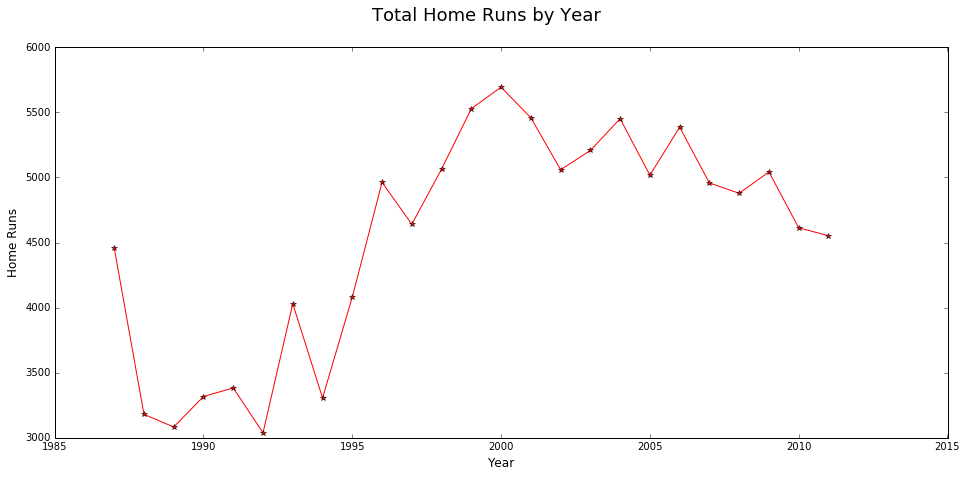

In [11]:
plt.figure(figsize = (16,7))
plt.plot(hrs_by_year.tail(25), color = 'red', marker= '*')
plt.suptitle('Total Home Runs by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Runs', fontsize=12)

**Number of Stolen Bases by Year**

Next, I wanted to look at the number of stolen bases by season to see how that compared to home runs and doubles. I would think that because the players were bulking up and getting bigger that in essence they wouldn't be as fast and ultimately wouldn't steal as many bases. The data supports this conclusion or that the increase in home runs and doubles decreased the need for players to steal bases. 

In [12]:
sb_by_year = bs.groupby(['Year'])['SB'].sum()  # grouping data by year and stolen bases

In [13]:
sb_by_year.tail(25)

Year
1987    3585.0
1988    3301.0
1989    3116.0
1990    3290.0
1991    3120.0
1992    3264.0
1993    3263.0
1994    2258.0
1995    2933.0
1996    3239.0
1997    3308.0
1998    3284.0
1999    3421.0
2000    2924.0
2001    3103.0
2002    2750.0
2003    2573.0
2004    2589.0
2005    2566.0
2006    2767.0
2007    2918.0
2008    2799.0
2009    2970.0
2010    2959.0
2011    3279.0
Name: SB, dtype: float64

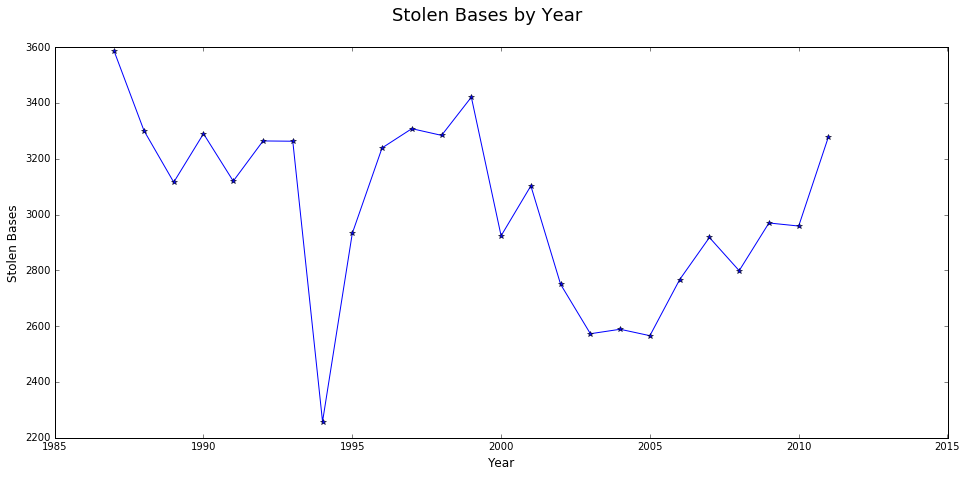

In [14]:
plt.figure(figsize = (16,7)) # plotting the data
plt.plot(sb_by_year.tail(25), color = 'blue', marker= '*')
plt.suptitle('Stolen Bases by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stolen Bases', fontsize=12)

**Number of Doubles by Year**

I also wanted to look the number of doubles by season over the same time period to see if it was somehow correlated to home runs. I would would expect to see a positive correlation between the two because a high percentage of doubles are all most home runs that just didn't have the height or distance to make it out of the park. By looking at the data, we do see a spike in doubles around the same time as home runs. 

In [15]:
scndbase_by_year = bs.groupby(['Year'])['2B'].sum()  # grouping data by year and doubles
scndbase_by_year.tail(25)

Year
1987    6793.0
1988    6386.0
1989    6307.0
1990    6526.0
1991    6499.0
1992    6563.0
1993    7449.0
1994    5723.0
1995    6958.0
1996    7987.0
1997    8004.0
1998    8741.0
1999    8740.0
2000    8902.0
2001    8813.0
2002    8700.0
2003    8827.0
2004    8919.0
2005    8863.0
2006    9135.0
2007    9197.0
2008    9014.0
2009    8737.0
2010    8486.0
2011    8399.0
Name: 2B, dtype: float64

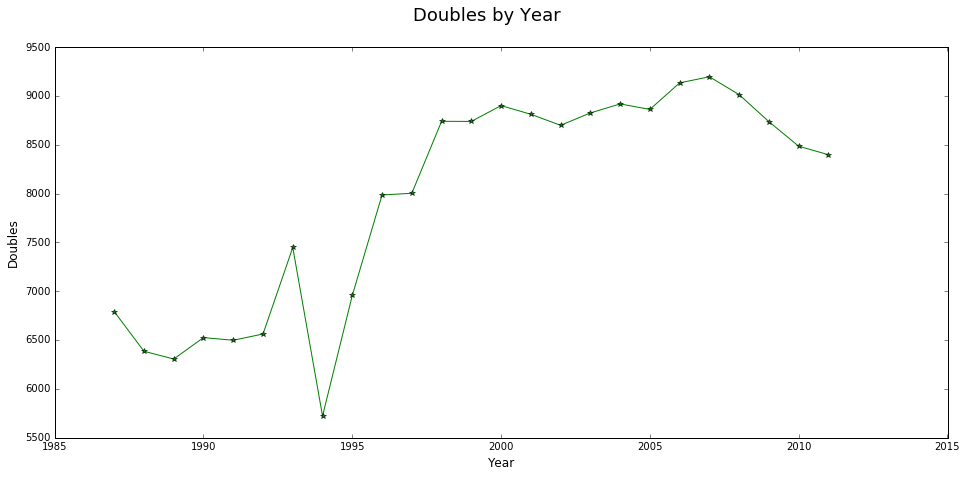

In [16]:
plt.figure(figsize = (16,7)) # plotting our data
plt.plot(scndbase_by_year.tail(25), color = 'green', marker= '*')
plt.suptitle('Doubles by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Doubles', fontsize=12)

**Number of Hits by Year**

I wanted to also plot the number of hits because the number of hits could have increased at the same time as home runs. Meaning that the increase hits could have drove up the number of home runs in proportion, not supporting our assumption. The data shows a postive correlation between hits with home runs, and hits and doubles. 

In [17]:
hits_by_year = bs.groupby(['Year'])['H'].sum() # grouping data by year and hits
hits_by_year.tail(25)

Year
1987    37895.0
1988    36244.0
1989    36293.0
1990    36817.0
1991    36558.0
1992    36544.0
1993    41088.0
1994    29743.0
1995    36975.0
1996    42320.0
1997    41471.0
1998    44489.0
1999    45327.0
2000    45246.0
2001    43879.0
2002    43272.0
2003    44057.0
2004    44522.0
2005    43991.0
2006    45073.0
2007    44977.0
2008    43972.0
2009    43524.0
2010    42554.0
2011    42267.0
Name: H, dtype: float64

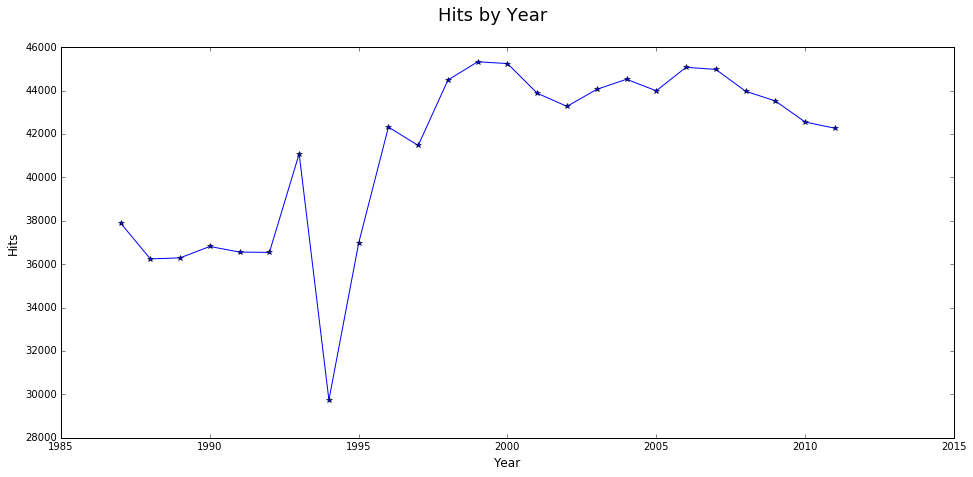

In [18]:
plt.figure(figsize = (16,7))  # plotting our data
plt.plot(hits_by_year.tail(25), color = 'blue', marker= '*',)
plt.suptitle('Hits by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hits', fontsize=12)

**Stacked Bar Graph of Hits**

So let's dive a little deeper and break down the number of home runs and doubles as a percentage of hits.  Looking a this stack bar graph helps show the percentage increase in doubles and home runs, but it does not clearly displaying as accurate of a picture as I would like. 

In [19]:
df = bs.groupby(['Year'])['2B','HR','H'].sum()  #looking at the homeruns and doubles as a % of total hits
df = df.tail(25) 
df['Other'] = df['H'] - df['HR'] - df['2B']
df['% HR'] = df['HR'] / df['H']
df['% 2B'] = df['2B'] / df['H']
df['% Other'] = df['Other'] / df['H']
df = df.drop ('2B', 1)
df = df.drop ('HR', 1)
df = df.drop ('H', 1)
df = df.drop ('Other', 1)
df

,% HR,% 2B,% Other
Year,,,
1987,0.117641,0.179258,0.703101
1988,0.087739,0.176195,0.736067
1989,0.084948,0.173780,0.741272
1990,0.090094,0.177255,0.732651
1991,0.092538,0.177772,0.729690
1992,0.083133,0.179592,0.737276
1993,0.098082,0.181294,0.720624
1994,0.111152,0.192415,0.696433
1995,0.110372,0.188181,0.701447


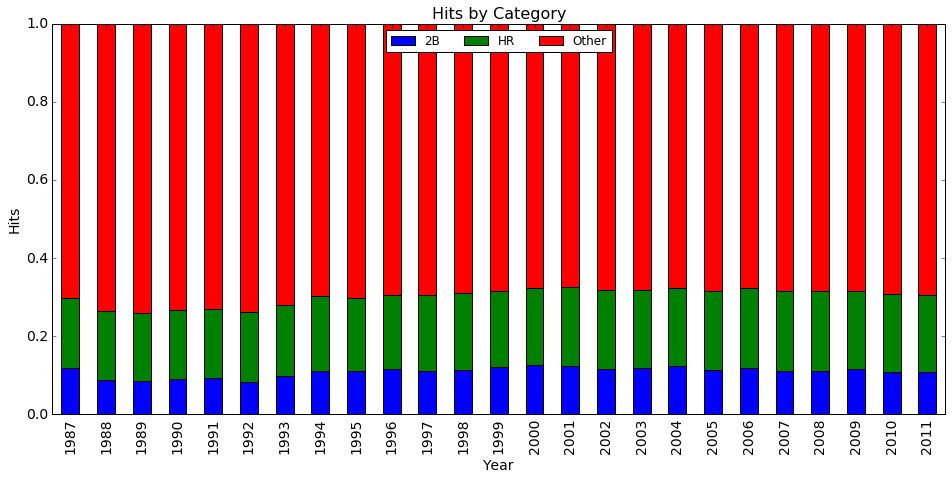

In [20]:
my_plot = df.plot(kind='bar',stacked=True,figsize=(16,7), fontsize = (14))  # creating a stacked bar graph
my_plot.set_title("Hits by Category", fontsize = (16))
my_plot.set_xlabel("Year", fontsize = (14))
my_plot.set_ylabel("Hits", fontsize = (14))
my_plot.legend(["2B","HR","Other"], loc=9,ncol=3)

**% of Home Runs**

So I decided to plot just the percentage of hits that were home runs to see if this can help us draw conclusions about the steroid era. Looking a the graph we can indeed see that even though hits increased, the percentage of home runs increased over the steroid period in baseball. 

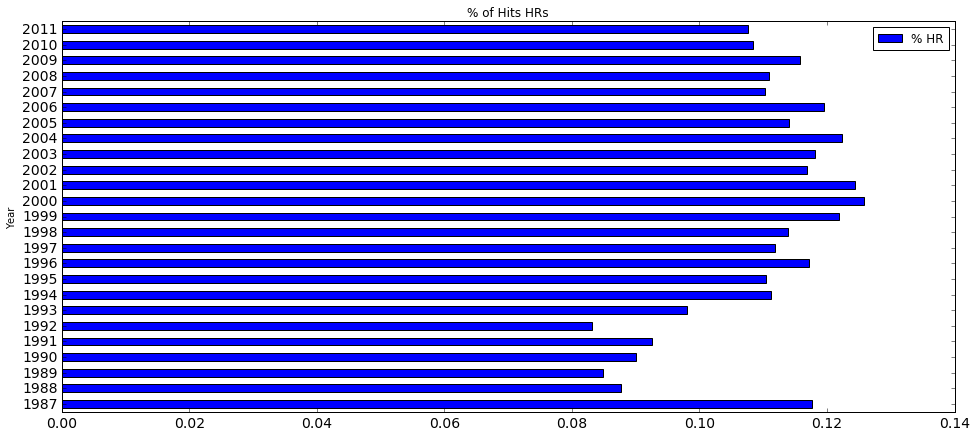

In [21]:
df2 = df.plot(kind='barh', figsize=(16,7), fontsize = (14), y = '% HR', title = '% of Hits HRs')  # ploting hrs as a % of total hits

## Conclusion 

In conclusion, there was a clear power surge in baseball offensive from the 1993 - 2004 period that increased that level of home runs hit in total and also as a percentage of hits. This power surge begins to decrease around the time when league increased their focus on testing for performance enhancing drugs. So all of the offensive records broken over this time period shouldn't be without and asterisk, because it seems like steroids were a major factor. 